<style>H1{color:deepskyblue;}</style>
# Import all necessary packages

INSTALL all necessary packages with the use of requirements.txt, execute the command below in your terminal to download/install all packages:</br>
`pip install -r requirements.txt`

**Configured Python kernel = 3.7.9 64-bit** 

```diff
+ If you have any questions please do not hesitate to contact me: 
```
mblomvliet@gmail.com 
```diff
+ Best,
+ Marc Blomvliet
```

In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import preprocessing 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn import svm

import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D, Input, LSTM, BatchNormalization,InputLayer
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

In [120]:
# path to the data parquet file
path_primary = "./data/primary_data.parquet"
path_secondary = "./data/secondary_data.parquet"

df_primary = pd.read_parquet(path_primary)
df_secondary = pd.read_parquet(path_secondary)

print(len(df_primary), len(df_secondary))
df_secondary.head(5)

173 61069


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,None,w,16.95,...,s,y,w,u,w,t,g,None,d,w
1,p,16.60,x,g,o,f,e,None,w,17.99,...,s,y,w,u,w,t,g,None,d,u
2,p,14.07,x,g,o,f,e,None,w,17.80,...,s,y,w,u,w,t,g,None,d,w
3,p,14.17,f,h,e,f,e,None,w,15.77,...,s,y,w,u,w,t,p,None,d,w
4,p,14.64,x,h,o,f,e,None,w,16.53,...,s,y,w,u,w,t,p,None,d,w


<style>H1{color:deepskyblue;}</style>
# EDA - Exploratory Data Analysis

['class', 'cap-diameter', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'habitat', 'season']


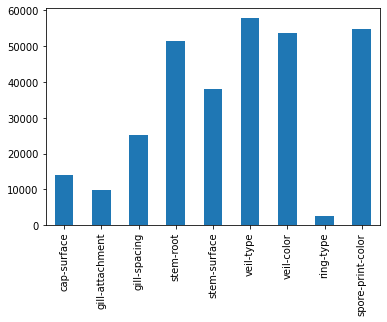

In [121]:
'''Plot the features that includes NaN Values.'''
df_secondary.isna().sum()[df_secondary.isna().sum()>0].plot(kind='bar')

'''Get the features that are complete and don't contain any NaN values.'''
complete_features = df_secondary.columns[~df_secondary.isna().any()].tolist() 
print(complete_features)

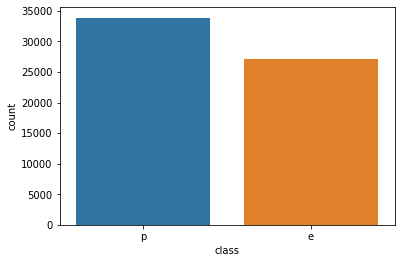

In [122]:
ax = sns.countplot(x="class", data=df_secondary)

(0.0, 80.0)

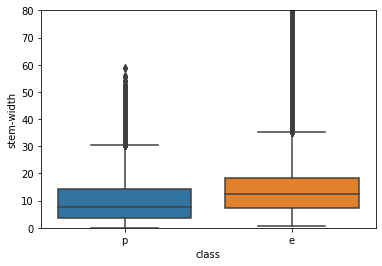

In [123]:
# Boxplot
ax = sns.boxplot(x="class", y="stem-width", data=df_secondary)
ax.set_ylim([0, 80])

<style>H1{color:deepskyblue;}</style>
# Feature selection

In [124]:
'''Decide which features to take into account.'''
columns = ['class', 'cap-diameter', 'stem-height', 'stem-width', 
            'cap-shape','cap-color', 'does-bruise-or-bleed', 
            'gill-color', 'stem-color', 'has-ring', 'habitat', 'season',
            'ring-type']
df = df_secondary[columns]
le = preprocessing.LabelEncoder() # Transform string into classes
for column_name in df.columns: 
    if df[column_name].dtype != np.float64: 
        df[column_name] = le.fit_transform(df[column_name])
        np.save('./class_encoders/'+column_name+'_encoder.npy', le.classes_)

    
df = df[df['ring-type'].notnull()]
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,class,cap-diameter,stem-height,stem-width,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-color,has-ring,habitat,season,ring-type
0,1,15.26,16.95,17.09,6,6,0,10,11,1,0,3,2
1,1,16.60,17.99,18.19,6,6,0,10,11,1,0,2,2
2,1,14.07,17.80,17.74,6,6,0,10,11,1,0,3,2
3,1,14.17,15.77,15.98,2,1,0,10,11,1,0,3,5
4,1,14.64,16.53,17.20,6,6,0,10,11,1,0,3,5


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   stem-height           61069 non-null  float64
 3   stem-width            61069 non-null  float64
 4   cap-shape             61069 non-null  int64  
 5   cap-color             61069 non-null  int64  
 6   does-bruise-or-bleed  61069 non-null  int64  
 7   gill-color            61069 non-null  int64  
 8   stem-color            61069 non-null  int64  
 9   has-ring              61069 non-null  int64  
 10  habitat               61069 non-null  int64  
 11  season                61069 non-null  int64  
 12  ring-type             61069 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.5 MB


<style>H1{color:deepskyblue;}</style>
# Modeling

In [126]:
X = df.drop(['class'],axis = 1) # Deselect target to predict
y = df[['class']] # Select target to predict

X_feature_importance = X # Save the dataframe to determine the feature importance after training
X = np.asarray(X).astype(np.float32) # Transform in the correct format, in order to train the models
y = np.asarray(y).astype(np.float32) # Transform in the correct format, in order to train the models

# 72% train, 7% test and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [127]:
class all_models:
    def __init__(self, X, Y):
        self.Xtrain = X
        self.Ytrain = Y
        
    def Neural_Network(self):
        model = Sequential()
        model.add(Dense(258, input_dim=self.Xtrain.shape[1], activation='relu'))
        model.add(Dense(258, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = 'accuracy') # Compile model
        return model

Epoch 1/40
688/688 - 2s - loss: 0.4558 - accuracy: 0.7722 - val_loss: 0.3128 - val_accuracy: 0.8636
Epoch 2/40
688/688 - 2s - loss: 0.2499 - accuracy: 0.8948 - val_loss: 0.2339 - val_accuracy: 0.9009
Epoch 3/40
688/688 - 2s - loss: 0.1680 - accuracy: 0.9362 - val_loss: 0.1430 - val_accuracy: 0.9432
Epoch 4/40
688/688 - 2s - loss: 0.1278 - accuracy: 0.9533 - val_loss: 0.1182 - val_accuracy: 0.9542
Epoch 5/40
688/688 - 2s - loss: 0.1078 - accuracy: 0.9608 - val_loss: 0.1059 - val_accuracy: 0.9574
Epoch 6/40
688/688 - 2s - loss: 0.0910 - accuracy: 0.9677 - val_loss: 0.0802 - val_accuracy: 0.9713
Epoch 7/40
688/688 - 2s - loss: 0.0769 - accuracy: 0.9731 - val_loss: 0.0865 - val_accuracy: 0.9643
Epoch 8/40
688/688 - 2s - loss: 0.0712 - accuracy: 0.9749 - val_loss: 0.0825 - val_accuracy: 0.9713
Epoch 9/40
688/688 - 2s - loss: 0.0689 - accuracy: 0.9746 - val_loss: 0.0699 - val_accuracy: 0.9753
Epoch 10/40
688/688 - 2s - loss: 0.0610 - accuracy: 0.9788 - val_loss: 0.0661 - val_accuracy: 0.9739

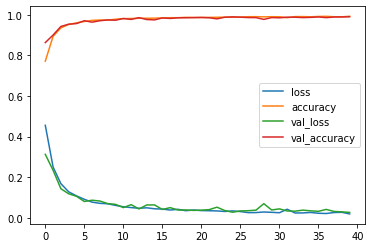

In [128]:
'''Train models'''
models = all_models(X_train,y_train)

NN = models.Neural_Network()
NN_model = NN.fit(x=X_train,y=y_train,
          validation_data=(X_val, y_val),
          batch_size=64,epochs=40,verbose=2)
losses = pd.DataFrame(NN.history.history)
losses.plot()

Pre_models = {}
Pre_models["LogisticRegression"]={"model":LogisticRegression()}
Pre_models["DecisionTreeClassifier"]={"model":DecisionTreeClassifier()}
Pre_models["RandomForestClassifier"]={"model":RandomForestClassifier()}
Pre_models["KNB_GaussianNB"]={"model":GaussianNB()}
Pre_models["KNB_CategoricalNB"]={"model":CategoricalNB()}
Pre_models["BernoulliNB"]={"model":BernoulliNB()}

for name,model in Pre_models.items():
    model["model"].fit(X_train,y_train.ravel())

<style>H2{color:grey;}</style>
<style>H1{color:deepskyblue;}</style>
# Evaluation
## Model accuracy's

In [129]:
pred= NN.predict(X_test)
pred = np.round(pred)
score = accuracy_score(y_test, pred)
print('NN', 'Accuracy =  {:.3f}%'.format(score*100))

for model_name, model in Pre_models.items():
    model = Pre_models[model_name]["model"]
    pred= model.predict(X_test)
    try:
        score = accuracy_score(y_test, pred)
        print(model_name, 'Accuracy =  {:.3f}%'.format(score*100))
    except:
        pass

NN Accuracy =  99.284%
LogisticRegression Accuracy =  62.567%
DecisionTreeClassifier Accuracy =  98.731%
RandomForestClassifier Accuracy =  99.611%
KNB_GaussianNB Accuracy =  59.415%
KNB_CategoricalNB Accuracy =  73.148%
BernoulliNB Accuracy =  59.026%


<style>H2{color:grey;}</style>
## Feature Importances

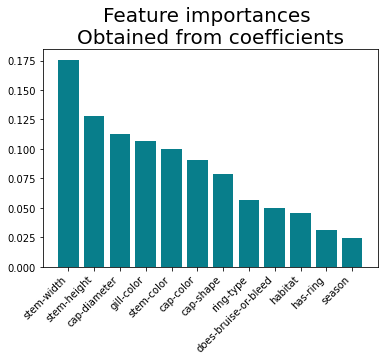

In [130]:
'''Plot the feature importances (correlation to the target: UnitSales). '''
model = Pre_models["RandomForestClassifier"]["model"]
ypred= model.predict(X_test)
importances = pd.DataFrame(data={
    'Attribute': X_feature_importance.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances \nObtained from coefficients', size=20)
plt.xticks(rotation='45', ha='right')
plt.show()

Results without NaN fill: </br>
NN Accuracy =  89.787% </br>
LogisticRegression Accuracy =  60.233% </br>
DecisionTreeClassifier Accuracy =  98.158% </br>
RandomForestClassifier Accuracy =  99.632% </br>
KNB_GaussianNB Accuracy =  61.339% </br>
KNB_CategoricalNB Accuracy =  69.382% </br>
BernoulliNB Accuracy =  59.026% </br>

<style>H1{color:deepskyblue;}</style>
# Save models

In [131]:
def save_models(model, name_algorithm=''):
    filename = './models/'+name_algorithm+'.pkl'
    pickle.dump(model, open(filename, 'wb'))

In [132]:
NN.save('./models/neural_network_MLP.h5') # Keras model (neural network), needs to be saved as a .h5 file. Predescribed by Keras
for model_name, trained_model in Pre_models.items():
    model_ = Pre_models[model_name]["model"]
    save_models(model_, name_algorithm = model_name)